In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
## remove these minimum zero values
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

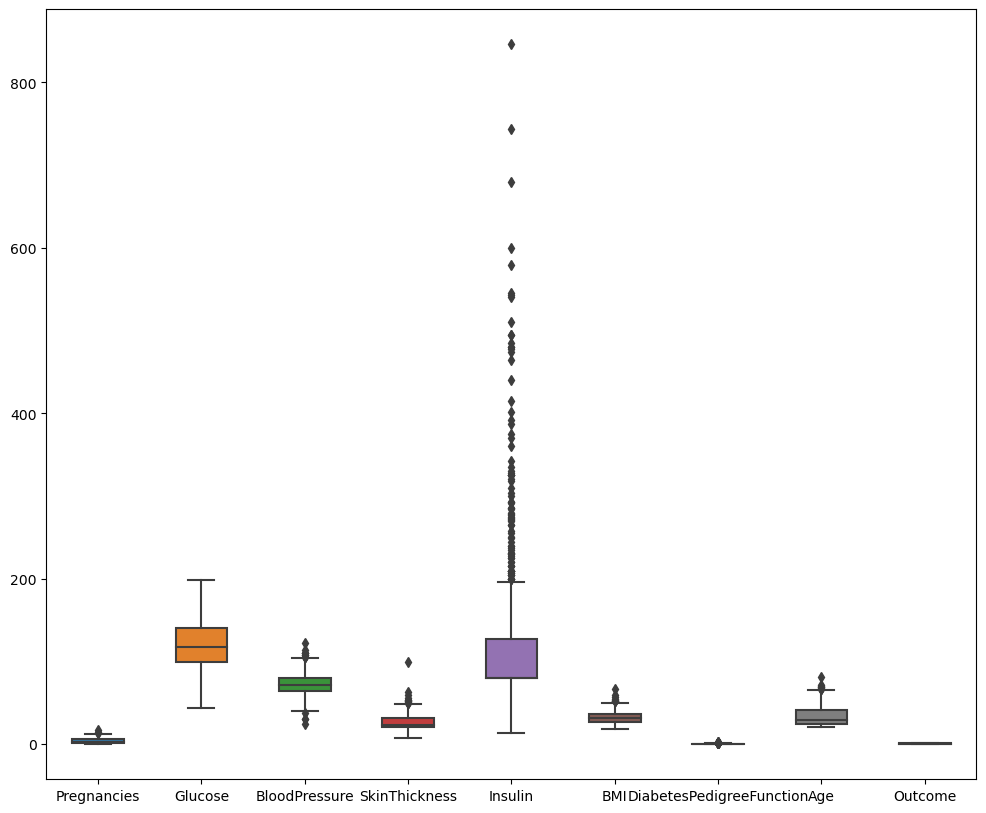

In [8]:
plt.subplots(figsize=(12,10))
sns.boxplot(data=data,width=0.5)

In [9]:
## There are outliers present in the data so remove them using standard scaler
## First lets split them in tain and test data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [10]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [13]:
import pickle

In [14]:

import warnings
warnings.filterwarnings('ignore')

In [15]:
## Training model in Decision Tree with hyperparameter training
parameter={'criterion':['gini','entropy','log_loss'],
           'splitter':['best','random'],
           'max_depth':[1,2,3,4,5],
           'max_features':['auto','sqrt','log2'] }

           

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
dtc=DecisionTreeClassifier()

In [18]:
gsc_dt=GridSearchCV(dtc,param_grid=parameter,cv=3,scoring='accuracy',verbose=3)

In [39]:
gsc_dt.fit(x_train,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.656 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.656 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.661 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.661 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.656 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.661 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.656 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.672 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [60]:
gsc_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [61]:
gsc_dt.best_score_

0.7777777777777778

In [67]:
## Now will make our Decision Tree using these parameters
dtc=DecisionTreeClassifier(criterion='log_loss',max_depth=5,max_features='auto',splitter='best')

In [68]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='auto')

In [69]:
y_pred=dtc.predict(x_test)

In [70]:
## accuracy and confusion matrix
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7291666666666666
[[100  21]
 [ 31  40]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       121
           1       0.66      0.56      0.61        71

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.72       192



In [46]:
pickle.dump(dtc,open('pickle_files/dtc_diabetes.pkl','wb'))

## Now lets see Support Vector Classifier


In [28]:
parameter={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.001,0.0001],
            'kernel':['linear','rbf']}

In [29]:
gsc_svc=GridSearchCV(SVC(),param_grid=parameter,cv=3,verbose=3,scoring='accuracy',refit=True)

In [30]:
gsc_svc.fit(x_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.802 total time=   0.5s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.3s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.1s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.802 total time=   0.4s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.745 total time=   0.3s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.1s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=3)

In [34]:
gsc_svc.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [35]:
svc=SVC(C=1,gamma=0.0001,kernel='rbf')

In [36]:
svc.fit(x_train,y_train)

SVC(C=1, gamma=0.0001)

In [37]:
y_pred=svc.predict(x_test)

In [38]:
## checking the accuracy
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6979166666666666
[[108  13]
 [ 45  26]]
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       121
           1       0.67      0.37      0.47        71

    accuracy                           0.70       192
   macro avg       0.69      0.63      0.63       192
weighted avg       0.69      0.70      0.67       192



## Let's see using naive bayse

In [71]:
nb=BernoulliNB()

In [72]:
nb.fit(x_train_scaled,y_train)

BernoulliNB()

In [73]:
y_pred=nb.predict(x_test_scaled)

In [74]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.703125
[[98 23]
 [34 37]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       121
           1       0.62      0.52      0.56        71

    accuracy                           0.70       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.70      0.70      0.70       192

